In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [2]:
import torch
from torch import nn

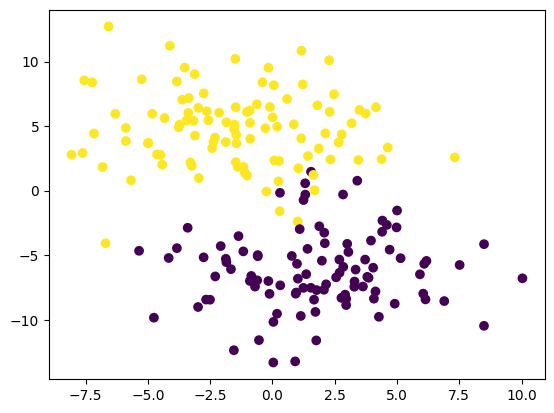

In [3]:
X,y = make_blobs(n_samples=200, n_features=2, cluster_std=3,centers=2,random_state=111)
plt.scatter(X[:,0],X[:,1], c=y);

In [4]:
X= torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

In [5]:
model =nn.Sequential(nn.Linear(2,1),nn.Sigmoid())
print(model.parameters)

<bound method Module.parameters of Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): Sigmoid()
)>


In [6]:
optimiser = torch.optim.SGD(model.parameters(), lr=0.1)

loss = torch.nn.BCELoss()

In [7]:
def comp_accuracy(true_labels, pred_labels):
    accuracy = torch.sum(true_labels.view(-1).float() == 
                         pred_labels.float()).item() / true_labels.size(0)
    return accuracy

In [8]:
epochs=200

for epoch in range(epochs):

    result = model(X)

    train_loss = loss(result ,y.reshape(-1,1))

    optimiser.zero_grad()

    train_loss.backward()

    optimiser.step()

    accuracy = torch.sum(y==torch.where(model(X).view(-1)>=0.5,1,0)).item() / y.size(0)

    if epoch % 10 == 0:

        print(f"Epoch: {epoch} | Accuracy score: {accuracy:.2f}")

for i in model.named_parameters():

    print(i)



Epoch: 0 | Accuracy score: 0.13
Epoch: 10 | Accuracy score: 0.96
Epoch: 20 | Accuracy score: 0.96
Epoch: 30 | Accuracy score: 0.97
Epoch: 40 | Accuracy score: 0.97
Epoch: 50 | Accuracy score: 0.97
Epoch: 60 | Accuracy score: 0.97
Epoch: 70 | Accuracy score: 0.97
Epoch: 80 | Accuracy score: 0.97
Epoch: 90 | Accuracy score: 0.97
Epoch: 100 | Accuracy score: 0.97
Epoch: 110 | Accuracy score: 0.97
Epoch: 120 | Accuracy score: 0.97
Epoch: 130 | Accuracy score: 0.97
Epoch: 140 | Accuracy score: 0.97
Epoch: 150 | Accuracy score: 0.97
Epoch: 160 | Accuracy score: 0.97
Epoch: 170 | Accuracy score: 0.97
Epoch: 180 | Accuracy score: 0.97
Epoch: 190 | Accuracy score: 0.96
('0.weight', Parameter containing:
tensor([[-0.4083,  1.0544]], requires_grad=True))
('0.bias', Parameter containing:
tensor([0.3152], requires_grad=True))


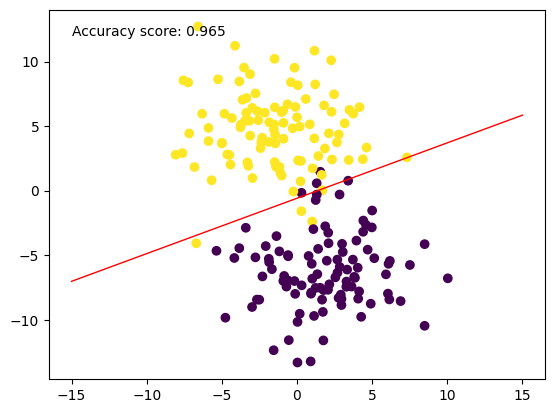

In [9]:
a=0.4878/1.1369
xx=torch.linspace(-15,15,100)
yy=a*xx-(0.6724)/1.1369

plt.scatter(X[:,0],X[:,1], c =y)
plt.plot(xx,yy,linewidth=1,color='red')
plt.annotate((f"Accuracy score: {accuracy:.3f}"), (-15,12))
plt.show();